# Objective 1


## Imports

In [ ]:
# Imports

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

I looked up how to read CSV files from this source:
https://www.scaler.com/topics/pandas/read-csv-file-in-python-pandas/

## Loading the data file

In [ ]:
# Reading the url to get the data
url = "https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv"
df =pd.read_csv(url)
df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url

## Finding the NaN counts in each feature

Treatment_Behavior      0
MEK_N                   4
ELK_N                  15
Bcatenin_N             15
pCFOS_N                60
H3AcK18_N             150
BAD_N                 180
EGR1_N                180
H3MeK4_N              180
BCL2_N                195
dtype: int64


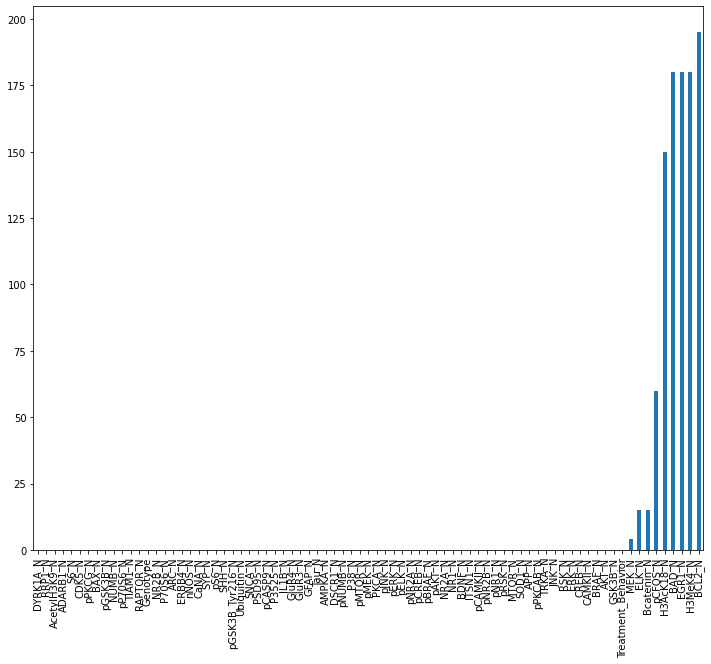

In [ ]:
nan_count = df.isna().sum().sort_values() # Calculating all the NaN values that are there in each column
plt.figure(figsize = (12, 10))
nan_count.plot(kind = "bar") # plotting the NaN values in ascending order
print(nan_count[-10:]) # Printing the last 10 variables with maximum NaN values

## Saving the dataframe with usable variables in a different variable
df_new = df.drop(['Treatment_Behavior', 'Genotype'], axis = 1) # Removing the target columns for now
df_usable = df_new.loc[:, df_new.isna().sum() <= 50]
# df_usable = df_usable.drop("Genotype")

We can see that here the proteins after pCFOS_N have a significant amount of NaN values. Therefore, they are not usable.

I used the following references to find the method of sorting NaN values in pandas dataframe:
https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe

## Seperating target and features

In [ ]:
# Data synthesis
df_target = df[["Genotype", "Treatment_Behavior"]]
df_target['Treatment_Behavior'] = df_target['Treatment_Behavior'].map({"Memantine_C/S": 0, "Memantine_S/C": 1, "Saline_C/S": 2, "Saline_S/C": 3}) # Mapping goups to number
df_target['Genotype'] = df_target['Genotype'].map({'Control': 0, 'Ts65Dn': 1}) # Making it binary
df_target

<ipython-input-4-210619d69da3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['Treatment_Behavior'] = df_target['Treatment_Behavior'].map({"Memantine_C/S": 0, "Memantine_S/C": 1, "Saline_C/S": 2, "Saline_S/C": 3}) # Mapping goups to number
<ipython-input-4-210619d69da3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['Genotype'] = df_target['Genotype'].map({'Control': 0, 'Ts65Dn': 1}) # Making it binary


,Genotype,Treatment_Behavior
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
757,1,3
758,1,3
759,1,3
760,1,3


## Plotting Variances of each feature

GFAP_N       0.000195
pS6_N        0.000223
ARC_N        0.000223
ERBB4_N      0.000251
BAX_N        0.000357
               ...   
pELK_N       0.260744
pPKCG_N      0.296291
ERK_N        0.414775
NR2A_N       0.863416
pCAMKII_N    1.608825
Length: 71, dtype: float64


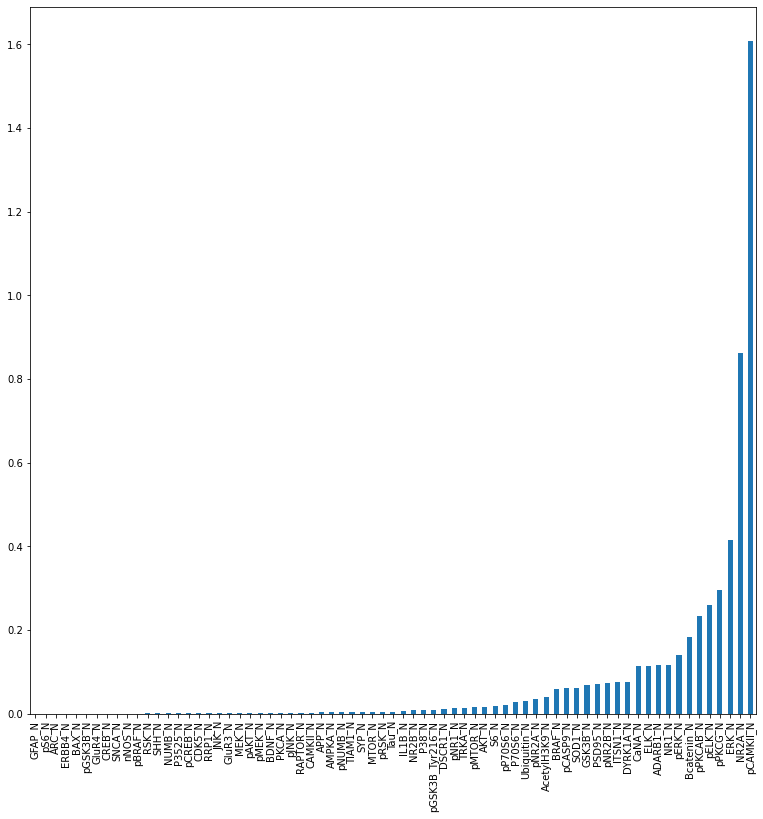

In [ ]:
variances = df_usable.var().sort_values() #As done before we calculate the variances of the columns and sort them
plt.figure(figsize = (13, 13))
variances.plot(kind = "bar") #plotting the values 
print(variances) #Checking a significant threshold of variance which is this case is after variance 0.002
df_filtered = df_usable.loc[:, variances > 0.002] #Storing filtered dataframe in another variable

We choose a very low threshold for variance so that any useful feature is not removed early as we still have to check their correlation matrix. 

As for reference:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

This was used to understand how dataframe can be indexed and other nuances.

<AxesSubplot:>

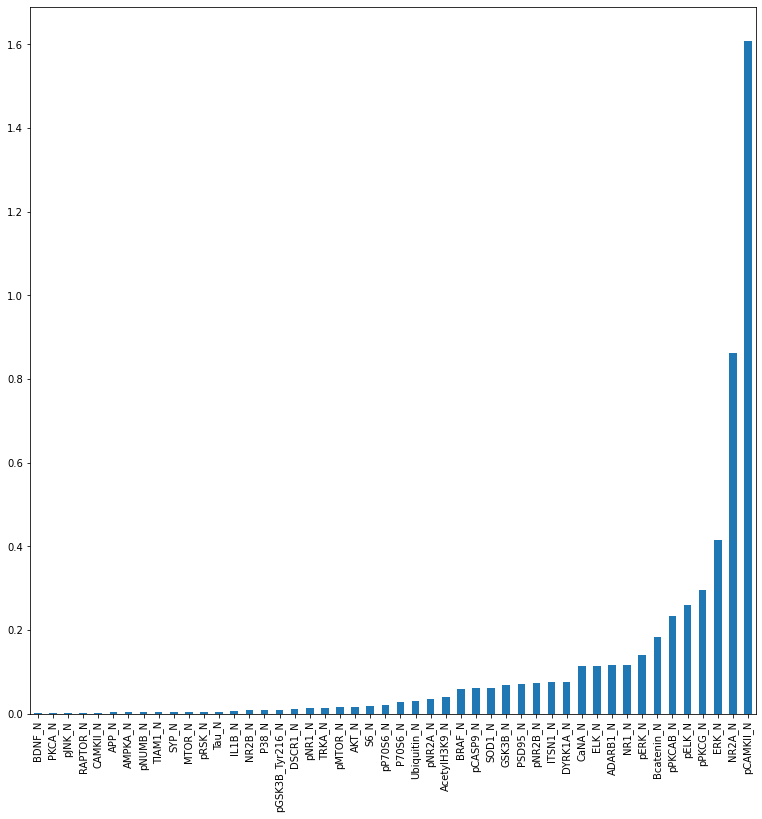

In [ ]:
#plot of variance after removing bad features
plt.figure(figsize = (13, 13))
df_filtered.var().sort_values().plot(kind = "bar")

## Heat Map and features with variances greater than 0.9

DYRK1A_N           3
ITSN1_N            3
BDNF_N             0
NR1_N              2
NR2A_N             0
pCAMKII_N          0
pELK_N             0
pERK_N             3
pJNK_N             0
PKCA_N             0
pNR1_N             2
pNR2A_N            0
pNR2B_N            1
pPKCAB_N           0
pRSK_N             0
AKT_N              0
BRAF_N             3
CAMKII_N           0
ELK_N              0
ERK_N              0
GSK3B_N            0
TRKA_N             0
APP_N              0
Bcatenin_N         1
SOD1_N             0
MTOR_N             0
P38_N              0
pMTOR_N            0
DSCR1_N            0
AMPKA_N            0
NR2B_N             0
pNUMB_N            0
RAPTOR_N           0
TIAM1_N            0
pP70S6_N           0
P70S6_N            0
pPKCG_N            0
S6_N               0
ADARB1_N           0
AcetylH3K9_N       0
Tau_N              0
IL1B_N             0
pCASP9_N           0
PSD95_N            0
Ubiquitin_N        0
pGSK3B_Tyr216_N    0
SYP_N              0
CaNA_N       

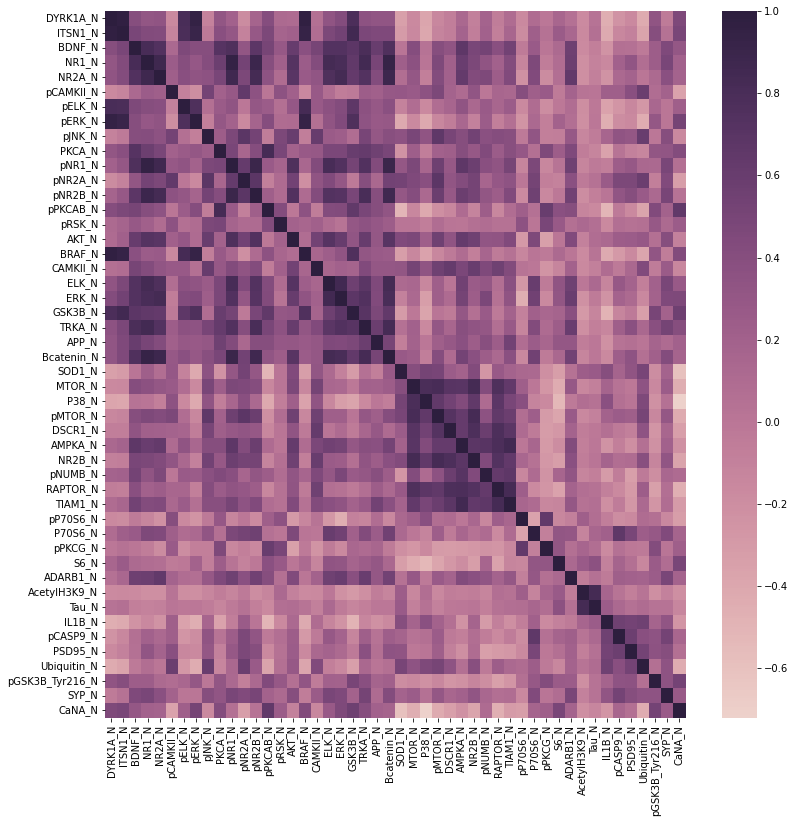

In [ ]:
#Plotting heatmap
plt.figure(figsize = (13, 13))
ax = sns.heatmap(df_filtered.corr(), cmap=sns.cubehelix_palette(as_cmap=True))

# Features with more than 0.9 correlation
cor = df_filtered.corr() > 0.9
data_top = df_filtered.head()
cor.sum() - 1

It can be see that there are many feature which are correlated with their correlation being more than 0.9

Reference:
https://seaborn.pydata.org/generated/seaborn.heatmap.html

## Checking Balanced Classes

In [ ]:
## Learning about the nature of target variables which here are Genotype and treatment_behaviour
df_g = df.groupby('Genotype') # Extracting no. of groups and count for Genotype
df_t = df.groupby('Treatment_Behavior') # Extracting no. of groups and count for Treatment_Behavior
print(df_g.size(), df_t.size()) # Printing the values

Genotype
Control    435
Ts65Dn     327
dtype: int64 Treatment_Behavior
Memantine_C/S    225
Memantine_S/C    225
Saline_C/S       180
Saline_S/C       132
dtype: int64


Here we can see that the data is not balanced and for Genotype there are two different genes which are used for experimentation (Which is not balanced as well). 

As for treatment method there are four different methods which is also not balanced.

Reference:
https://stackoverflow.com/questions/27787930/how-to-get-number-of-groups-in-a-groupby-object-in-pandas

In [ ]:
# trainDF, testDF = train_test_split(df, test_size = 0.33)
## This can be used if we only have one data set

Splitting data in training and test https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Imputing features

In [ ]:
# Initialization of imupter and training
imputer = IterativeImputer(random_state=0)
imputer.fit(df_filtered)

# Implimenting imputer
df_imputed = imputer.transform(df_filtered)

# Sanity check
print("Shape of the df_imputed array is ", df_imputed.shape)

# Data synthesis
df_imputed = pd.DataFrame(df_imputed)
scaler = StandardScaler()
scaler.fit(df_imputed)
df_scaled = scaler.transform(df_imputed)
df_imputed = pd.DataFrame(df_scaled)
df_imputed

Shape of the df_imputed array is  (762, 48)


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.239745,0.428489,2.372452,1.471921,2.269552,-0.898820,0.595213,0.332785,-0.148771,1.744386,...,0.472499,-0.207718,-1.193020,-1.146591,0.281954,-0.887186,-1.095437,-0.158189,-0.371984,0.943046
1,0.279648,0.216934,1.976690,1.393675,1.940975,-0.963191,0.292333,0.351763,-0.292219,1.400565,...,0.376450,-0.201188,-1.063504,-0.840216,0.557972,-0.926013,-1.298497,0.025901,-0.139388,1.144768
2,0.259888,0.366815,2.117287,1.095124,1.873152,-0.970144,0.223626,0.304564,-0.444364,1.298019,...,0.298070,-0.131171,-1.087950,-0.216721,0.524945,-0.879791,-1.373918,-0.000721,-0.232612,1.687436
3,0.015969,-0.045054,0.833934,0.452418,1.181185,-1.073520,0.289803,0.053109,-0.337665,1.217463,...,0.060971,-0.259222,-1.221260,-1.146142,-0.196792,-1.105121,-1.412237,-0.140312,-0.940673,1.016991
4,-0.010091,-0.043766,0.837716,0.157224,0.900303,-1.087947,0.111757,-0.033273,-0.528799,0.937971,...,0.085112,-0.235011,-1.026970,-0.558730,0.005746,-0.908986,-1.368552,0.331411,-0.258680,1.430089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,-0.158354,-0.020962,-0.070527,-0.606540,-0.611634,-0.240028,-0.447289,-0.255254,0.075654,-0.236481,...,-0.285491,0.212416,1.488306,-0.357659,0.360773,-0.047640,-0.567211,1.606940,-0.145392,0.345848
758,-0.130826,0.109601,0.042935,-0.373432,-0.507093,-0.101537,-0.385489,-0.233000,0.309205,0.124020,...,-0.226188,0.264841,1.616549,0.043019,0.501014,0.094639,-0.463558,2.043400,-0.085877,0.470936
759,-0.201944,-0.156166,-0.027925,-0.700047,-0.871242,-0.399737,-0.388938,-0.322581,0.793714,0.129006,...,-0.295047,0.140449,0.978049,-0.641963,-0.118256,-0.538346,-0.224671,1.060202,-0.441216,0.224291
760,-0.262164,-0.208343,-0.469880,-0.895755,-1.183635,-0.445606,-0.528465,-0.350264,0.231584,-0.152548,...,-0.339911,0.220887,1.183143,-0.010527,0.140343,-0.138255,-0.122178,1.549577,0.154848,0.550098


As stated in the assignment. My reference for understanding how SimpleImputer works was https://scikit-learn.org/stable/modules/impute.html

## Defining scoring matric

I will be using accuracy score as a measure of accuracy of my model. 

$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$

For binary classification, accuracy can also be calculated in terms of positives and negatives as follows:

$$\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}$$

Where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives

## Finding hyperparameters  

### Linear SVM

#### For Genotype

In [ ]:
# Define the model
model_SVC = LinearSVC(max_iter = 25000)

# Define the hyperparameters
params = {'C': [1, 10, 100, 200, 300, 400]}

# Define the grid search with 5-fold cross validation
grid_LSVC = GridSearchCV(model_SVC, params, verbose = 3, n_jobs = -1, cv=5, scoring = 'accuracy')

# Fit the grid search on the data
grid_LSVC.fit(df_imputed.values, df_target['Genotype'].values)

# Print the best score and parameters
print(grid_LSVC.best_score_)
print(grid_LSVC.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.7201238390092879
{'C': 1}


#### For Treatment_Behavior

In [ ]:
# Define the model
model_SVC = LinearSVC(max_iter = 25000)

# Define the hyperparameters
params = {'C': [1, 10, 100, 200, 300, 400]}

# Define the grid search with 5-fold cross validation
grid_LSVC = GridSearchCV(model_SVC, params, verbose = 3, n_jobs = -1, cv=5, scoring = 'accuracy')

# Fit the grid search on the data
grid_LSVC.fit(df_imputed.values, df_target['Treatment_Behavior'].values)

# Print the best score and parameters
print(grid_LSVC.best_score_)
print(grid_LSVC.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.7270983832129343
{'C': 10}


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Here the value for hyperparameter of regularization turns out to be 200 

Reference:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#examples-using-sklearn-model-selection-gridsearchcv

This was used to understand how GridSearchCV works

### RBF Kernel SVM

#### Genotype

In [ ]:
# Params initialization and running grid search
C = np.logspace(-2, 5, 13)
gamma = np.logspace(-5, 10, 13)
param = dict(C = C, gamma = gamma)
grid_RBF = GridSearchCV(SVC(), param, verbose = 3, n_jobs = -1, cv=5, scoring = 'accuracy')

# Fit the grid search on the data
grid_RBF.fit(df_imputed.values, df_target['Genotype'].values) 
# Print the best score and parameters
print(grid_RBF.best_score_)
print(grid_RBF.best_params_)

Fitting 5 folds for each of 169 candidates, totalling 845 fits
0.841124871001032
{'C': 464.1588833612782, 'gamma': 0.0031622776601683794}


#### Treatment_Behavior

In [ ]:
# Params initialization and running grid search
C = np.logspace(-2, 5, 13)
gamma = np.logspace(-5, 10, 13)
param = dict(C = C, gamma = gamma)
grid_RBF = GridSearchCV(SVC(), param, verbose = 3, n_jobs = -1, cv=5, scoring = 'accuracy')

# Fit the grid search on the data
grid_RBF.fit(df_imputed.values, df_target['Treatment_Behavior'].values) 
# Print the best score and parameters
print(grid_RBF.best_score_)
print(grid_RBF.best_params_)

Fitting 5 folds for each of 169 candidates, totalling 845 fits
0.776969384244926
{'C': 26101.572156825387, 'gamma': 0.00017782794100389227}


### Neural Network

#### Genotype

In [ ]:
#Import
from sklearn.neural_network import MLPClassifier

# Initialization and fitting the model
model = MLPClassifier(activation='relu', solver='adam', random_state=42)

# Params initialization
alpha = np.logspace(-9, 2, 13)
hidden_layer_sizes = [(10,), (12,), (15,), (18,)]
params = dict(alpha = alpha, hidden_layer_sizes = hidden_layer_sizes)


grid_NN = GridSearchCV(model, params, verbose = 1, n_jobs = -1, cv = 5, scoring = "accuracy")
grid_NN.fit(df_imputed.values, df_target['Genotype'].values)

print(grid_NN.best_score_)
print(grid_NN.best_params_)

Fitting 5 folds for each of 52 candidates, totalling 260 fits
0.8109907120743033
{'alpha': 1.4677992676220675, 'hidden_layer_sizes': (15,)}


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Treatment_Behavior

In [ ]:
# Initialization and fitting the model
model = MLPClassifier(activation='relu', solver='adam', random_state=42)

# Params initialization
alpha = np.logspace(-9, 2, 13)
hidden_layer_sizes = [(15, 4), (18, 4), (20, 4), (25, 4)]
params = dict(alpha = alpha, hidden_layer_sizes = hidden_layer_sizes)


grid_NN = GridSearchCV(model, params, verbose = 1, n_jobs = -1, cv = 5, scoring = "accuracy")
grid_NN.fit(df_imputed.values, df_target['Treatment_behavior'].values)

print(grid_NN.best_score_)
print(grid_NN.best_params_)

Fitting 5 folds for each of 52 candidates, totalling 260 fits
0.8279927760577916
{'alpha': 1.4677992676220675, 'hidden_layer_sizes': (18, 4)}


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Random Forest Classifier

#### Genotype

In [ ]:
#Import
from sklearn.ensemble import RandomForestClassifier

# Credit Shashank Balaji 200070043

# Params initialization
max_features = [35, 45, 55, 65, 75]
max_depth = [8, 10, 12, 15, 25]
params = dict(max_features = max_features, max_depth = max_depth)

# Model initialization and running grid search on it
model = RandomForestClassifier(random_state = 0)
grid_RF = GridSearchCV(model, params, verbose = 1, n_jobs = -1, cv = 5, scoring = 'accuracy')

grid_RF.fit(df_imputed.values, df_target['Genotype'].values)

# Printing the score and best params
print(grid_RF.best_score_)
print(grid_RF.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", 

0.7165806673546612
{'max_depth': 10, 'max_features': 35}


#### Treatment_behavior

In [ ]:
# Params initialization
max_features = [35, 45, 55, 65]
max_depth = [8, 10, 12, 15, 25]
params = dict(max_features = max_features, max_depth = max_depth)

# Model initialization and running grid search on it
model = RandomForestClassifier(random_state = 0)
grid_RF = GridSearchCV(model, params, verbose = 1, n_jobs = -1, cv = 5, scoring = 'accuracy')

grid_RF.fit(df_imputed.values, df_target['Treatment_Behavior'].values)

# Printing the score and best params
print(grid_RF.best_score_)
print(grid_RF.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", 

0.669392844857241
{'max_depth': 10, 'max_features': 35}


We can see that we get the appropriate parameters with their accuracy being shown along with the parameters above. 

The references used to understand different models are mentioned below as well:

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html  RBF SVM kernel

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier For random forest

In [ ]:
proteins = df_filtered.columns
print(proteins)

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pCAMKII_N',
       'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N',
       'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'TRKA_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N',
       'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N',
       'TIAM1_N', 'pP70S6_N', 'P70S6_N', 'pPKCG_N', 'S6_N', 'ADARB1_N',
       'AcetylH3K9_N', 'Tau_N', 'IL1B_N', 'pCASP9_N', 'PSD95_N', 'Ubiquitin_N',
       'pGSK3B_Tyr216_N', 'SYP_N', 'CaNA_N'],
      dtype='object')


## Feature Importances

### For Linear SVM

#### Genotype

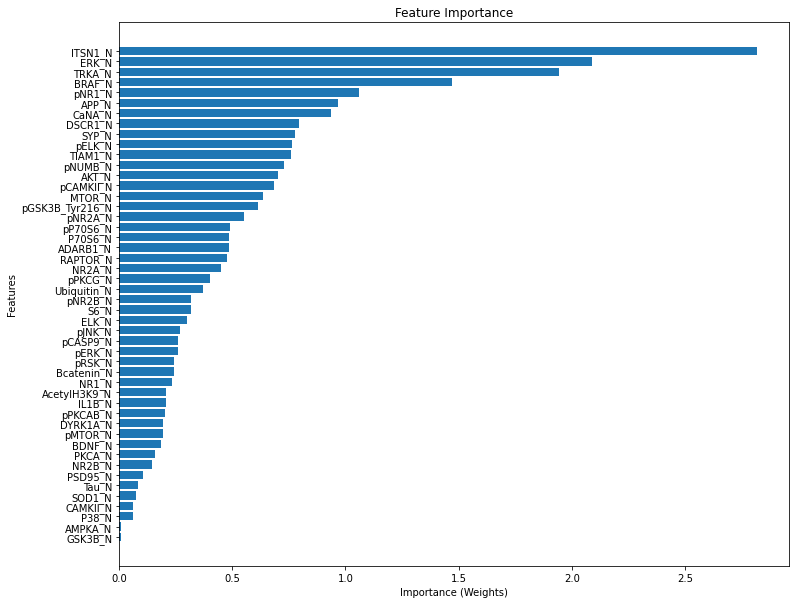

In [ ]:
#Model Initialization 
model = LinearSVC(max_iter = 30000, C = 1)
# Fitting the model
model.fit(df_imputed, df_target['Genotype'])

# Preparing the data
sorted_data = sorted(zip(abs(model.coef_[0]), proteins))
importance, features = zip(*sorted_data)

##Making the plot
plt.figure(figsize=(12, 10))
plt.barh(features, importance) 
plt.title('Feature Importance')
plt.xlabel('Importance (Weights)')
plt.ylabel('Features')
plt.show()

#### Treatment Behavior

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


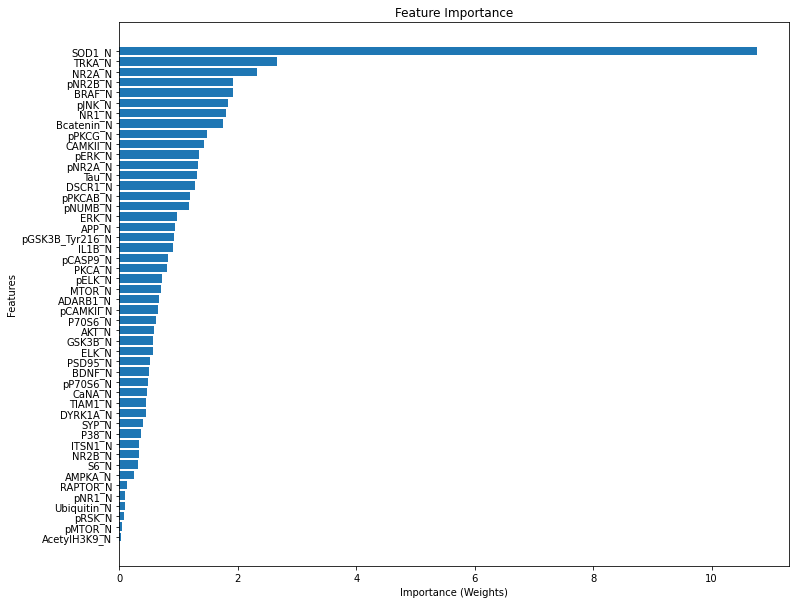

In [ ]:
#Model Initialization 
model = LinearSVC(max_iter = 30000, C = 10)
# Fitting the model
model.fit(df_imputed, df_target['Treatment_Behavior'])

# Preparing the data
sorted_data = sorted(zip(abs(model.coef_[0]), proteins))
importance, features = zip(*sorted_data)

##Making the plot
plt.figure(figsize=(12, 10))
plt.barh(features, importance) 
plt.title('Feature Importance')
plt.xlabel('Importance (Weights)')
plt.ylabel('Features')
plt.show()

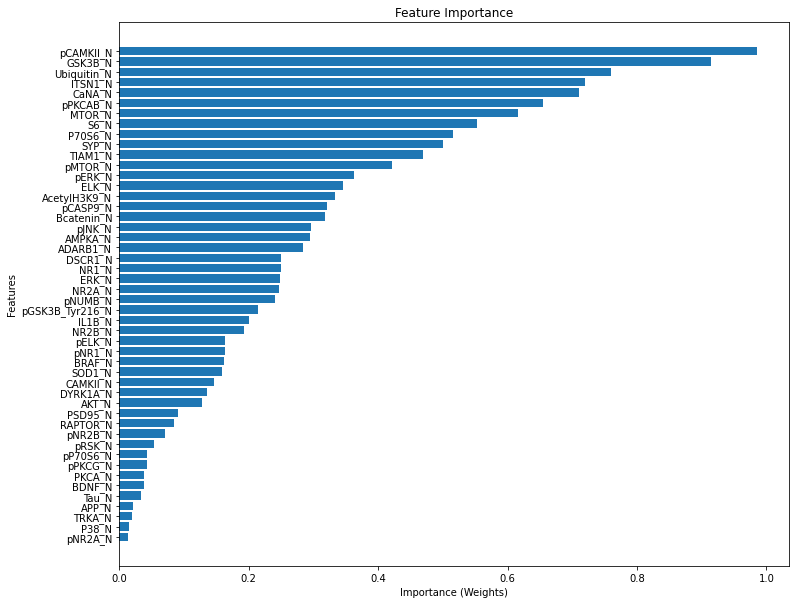

In [ ]:
# Preparing the data
sorted_data = sorted(zip(abs(model.coef_[1]), proteins))
importance, features = zip(*sorted_data)

##Making the plot
plt.figure(figsize=(12, 10))
plt.barh(features, importance) 
plt.title('Feature Importance')
plt.xlabel('Importance (Weights)')
plt.ylabel('Features')
plt.show()

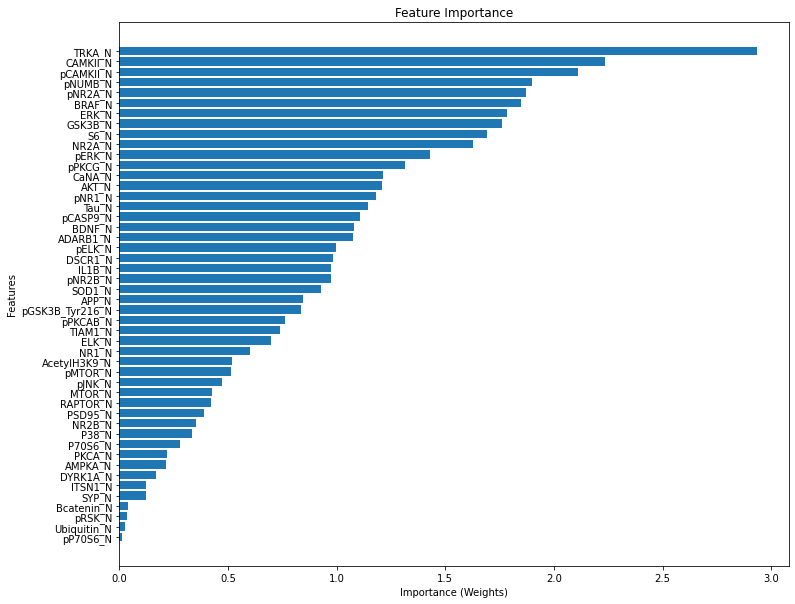

In [ ]:
# Preparing the data
sorted_data = sorted(zip(abs(model.coef_[2]), proteins))
importance, features = zip(*sorted_data)

##Making the plot
plt.figure(figsize=(12, 10))
plt.barh(features, importance) 
plt.title('Feature Importance')
plt.xlabel('Importance (Weights)')
plt.ylabel('Features')
plt.show()

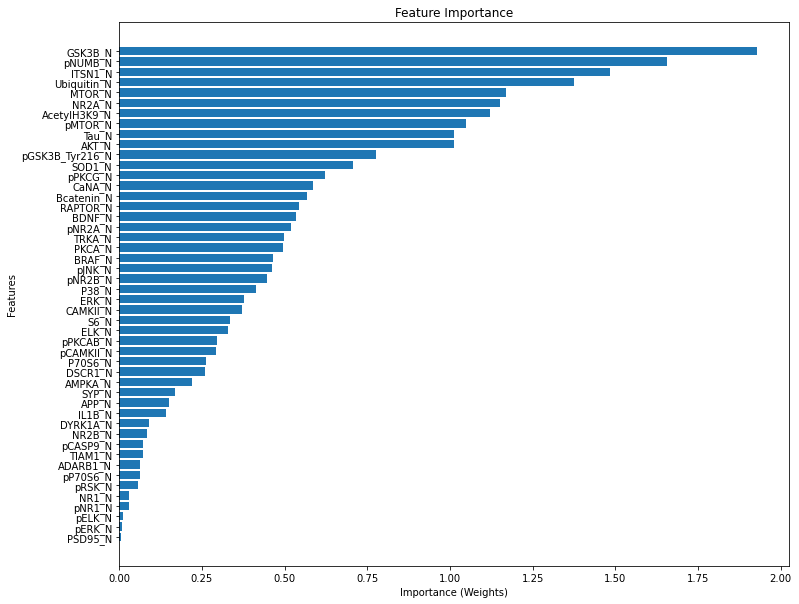

In [ ]:
# Preparing the data
sorted_data = sorted(zip(abs(model.coef_[3]), proteins))
importance, features = zip(*sorted_data)

##Making the plot
plt.figure(figsize=(12, 10))
plt.barh(features, importance) 
plt.title('Feature Importance')
plt.xlabel('Importance (Weights)')
plt.ylabel('Features')
plt.show()

For the first feature we can see that the absolute values of weights i.e. importance of features can be observed

Reference:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html

### For RBF Kernel SVM

#### Genotype

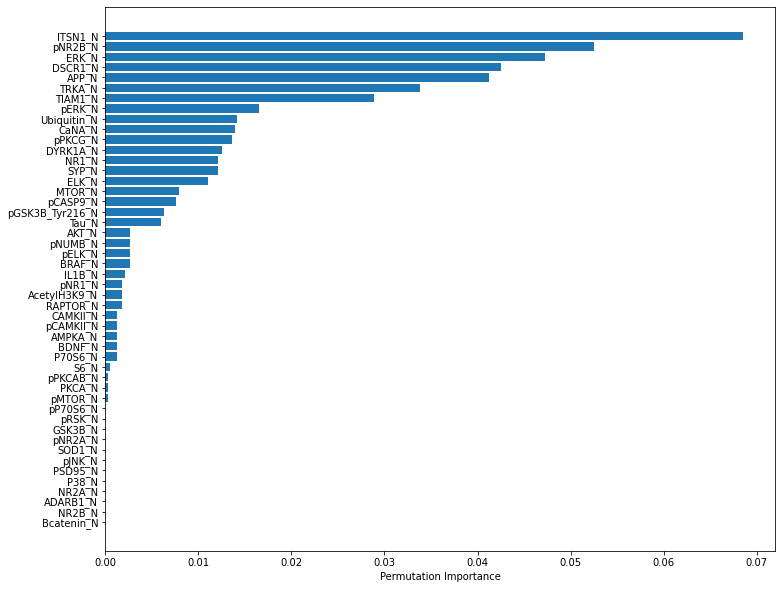

In [ ]:
### RBF SVM Feature importance
from sklearn.inspection import permutation_importance

## Training RBF SVM kernel model
svm = SVC(kernel = 'rbf', C = 464.1588833612782, gamma = 0.003162277660168379)

df_imputed.set_axis(proteins, axis=1, inplace=True)

svm.fit(df_imputed, df_target['Genotype'])

## Compute the permutation importance
perm_importance = permutation_importance(svm, df_imputed, df_target['Genotype'])

# Plot the feature importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize = (12, 10))
plt.barh(range(df_imputed.shape[1]), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(df_imputed.shape[1]), np.array(proteins)[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

#### Treatment Behavior

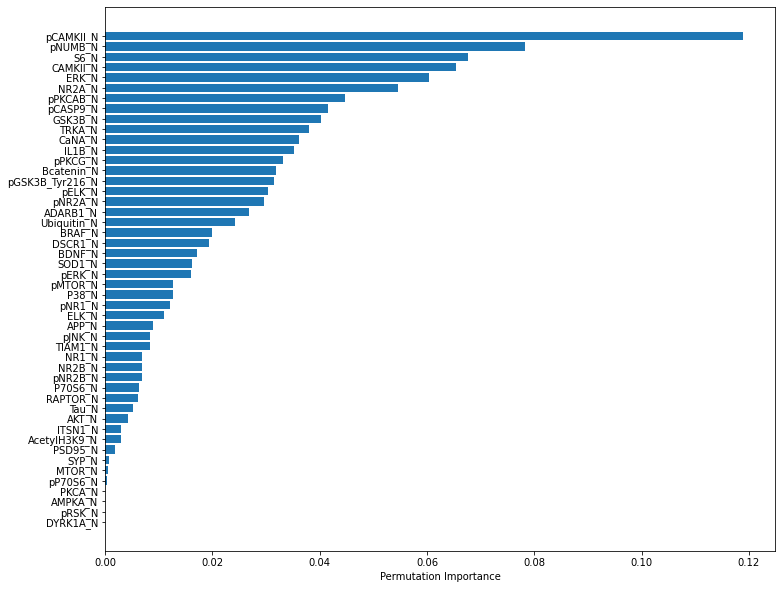

In [ ]:
## Training RBF SVM kernel model
svm = SVC(kernel = 'rbf', C = 26101.572156825387, gamma = 0.00017782794100389227)

df_imputed.set_axis(proteins, axis=1, inplace=True)

svm.fit(df_imputed, df_target['Treatment_Behavior'])

## Compute the permutation importance
perm_importance = permutation_importance(svm, df_imputed, df_target['Treatment_Behavior'])

# Plot the feature importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize = (12, 10))
plt.barh(range(df_imputed.shape[1]), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(df_imputed.shape[1]), np.array(proteins)[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

For the features with negative permutation importance we can assume their contribution to be equal to zero as they are either very noise or redundant

Reference:
https://stackoverflow.com/questions/41628264/how-to-determine-feature-importance-of-non-linear-kernals-in-svm

### For Neural Network

#### Genotype

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


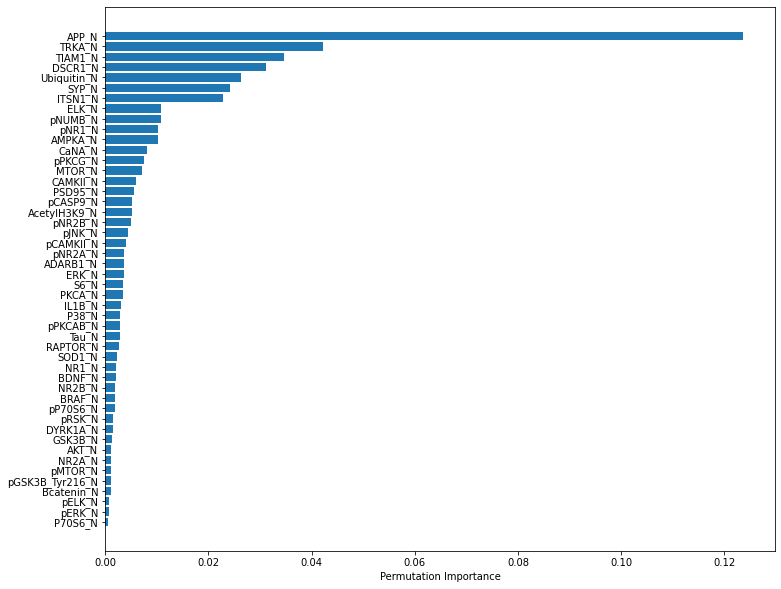

In [ ]:
# Initialization and fitting the model
model = MLPClassifier(hidden_layer_sizes=(15,), activation='relu', solver='adam', random_state=42, alpha= 1.4677992676220675)

model.fit(df_imputed, df_target['Genotype'])

## Compute the permutation importance
perm_importance = permutation_importance(model, df_imputed, df_target['Genotype'])

# Plot the feature importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize = (12, 10))
plt.barh(range(df_imputed.shape[1]), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(df_imputed.shape[1]), np.array(proteins)[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

#### Treatment Behavior

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


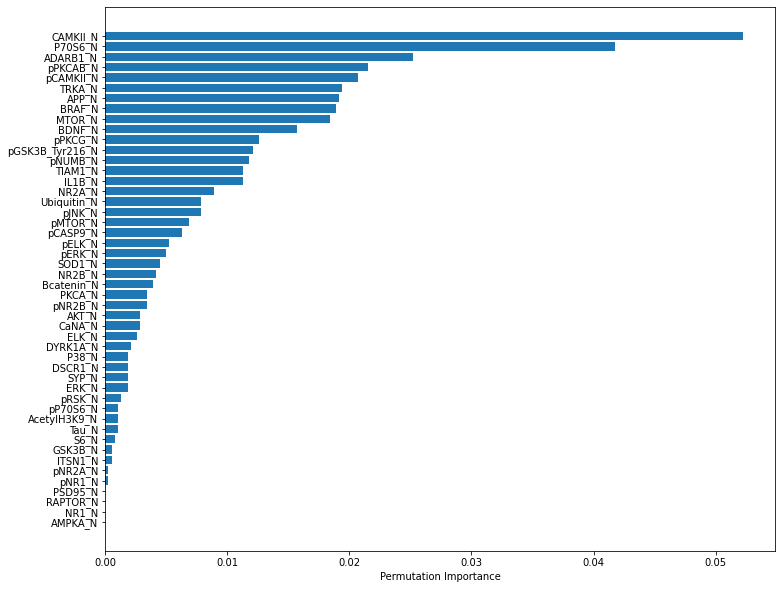

In [ ]:
# Initialization and fitting the model
model = MLPClassifier(hidden_layer_sizes=(18, 4), activation='relu', solver='adam', random_state=42, alpha=1.4677992676220675)

model.fit(df_imputed, df_target['Treatment_Behavior'])

## Compute the permutation importance
perm_importance = permutation_importance(model, df_imputed, df_target['Treatment_Behavior'])

# Plot the feature importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize = (12, 10))
plt.barh(range(df_imputed.shape[1]), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(df_imputed.shape[1]), np.array(proteins)[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

Like we did in RBF SVM here we followed a similar algorithm. Just that for using the model

Reference:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

https://machinelearningmastery.com/multi-label-classification-with-deep-learning/

### Random Forest

#### Genotype

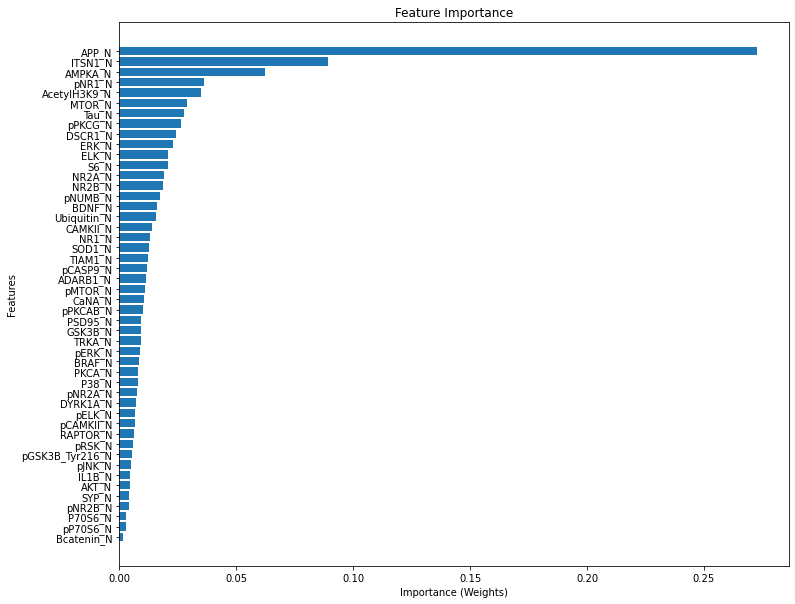

In [ ]:
# Initialization and training the model
model = RandomForestClassifier(random_state=0, max_depth = 10, max_features = 35)

model.fit(df_imputed, df_target['Genotype'])

# Preparing the data
sorted_data = sorted(zip(model.feature_importances_, proteins))
importance, features = zip(*sorted_data)

##Making the plot
plt.figure(figsize=(12, 10))
plt.barh(features, importance) 
plt.title('Feature Importance')
plt.xlabel('Importance (Weights)')
plt.ylabel('Features')
plt.show()

#### Treatment Behavior

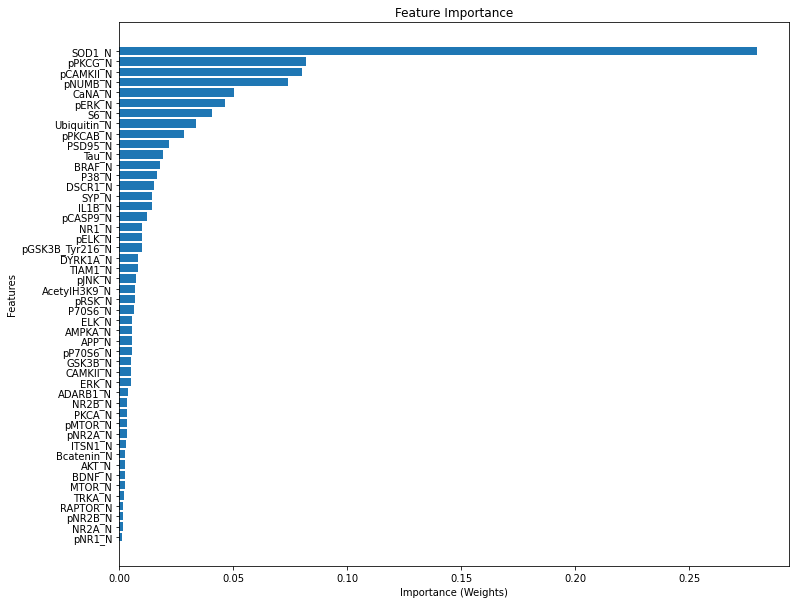

In [ ]:
# Initialization and training the model
model = RandomForestClassifier(random_state=0, max_depth = 10, max_features = 35)

model.fit(df_imputed, df_target['Treatment_Behavior'])

# Preparing the data
sorted_data = sorted(zip(model.feature_importances_, proteins))
importance, features = zip(*sorted_data)

##Making the plot
plt.figure(figsize=(12, 10))
plt.barh(features, importance) 
plt.title('Feature Importance')
plt.xlabel('Importance (Weights)')
plt.ylabel('Features')
plt.show()

Here we only get one set of weights for multilabel classification. From these weights we can find the importance of features.

Reference:

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

## Feature Elemination

### Linear SVM

#### Genotype

Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 fe

<AxesSubplot:>

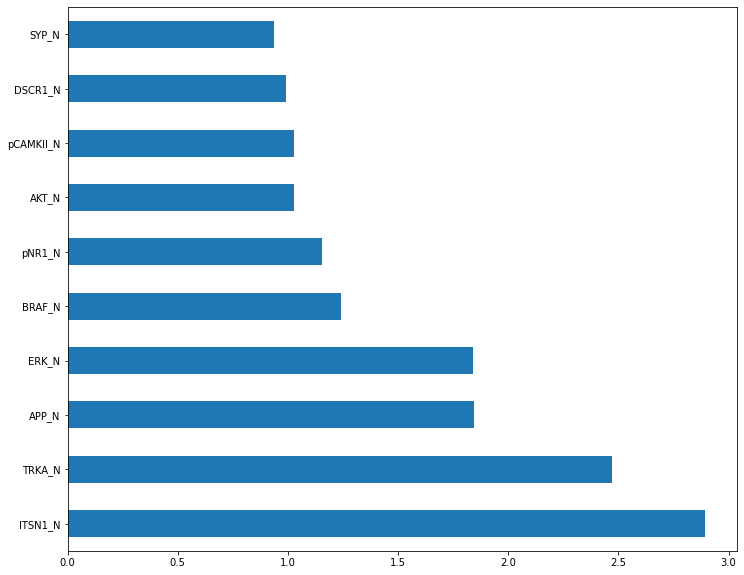

In [ ]:
#Import
from sklearn.feature_selection import RFECV

#Initialization of model
svm = SVC(kernel = "linear", C = 1)
selector = RFECV(svm, verbose = 1, scoring = 'accuracy', n_jobs = -1, cv =5)
selector.fit(df_imputed, df_target['Genotype'])
selected_featuresG = df_imputed.columns[selector.support_]

#Printing selected features
print("Selected features:", selected_featuresG)

#Scaling for these specific features
scalerLG = StandardScaler()
scalerLG.fit(df_imputed.loc[:, selected_featuresG])

dftrain_LG = pd.DataFrame(scalerLG.transform(df_imputed.loc[:, selected_featuresG]))

#Plotting best features found in a simple svm fit
svm.fit(df_imputed, df_target['Genotype'])
plt.figure(figsize = (12, 10))
pd.Series(abs(svm.coef_[0]), index=df_imputed.columns).nlargest(10).plot(kind='barh')

#### Treatment_behavior

Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 fe

<AxesSubplot:>

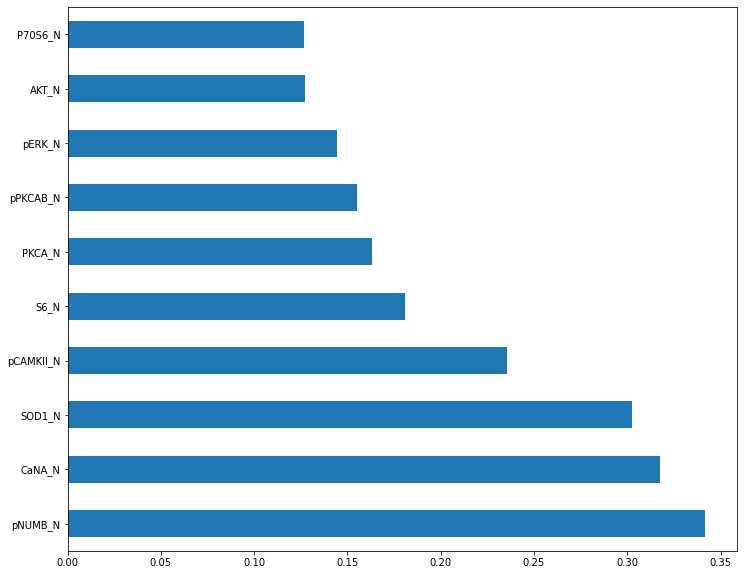

In [ ]:
#Initialization of model
svm = SVC(kernel = "linear", C = 10)
selector = RFECV(svm, verbose = 1, scoring = 'accuracy', n_jobs = -1, cv =5)
selector.fit(df_imputed, df_target['Treatment_Behavior'])
selected_features = df_imputed.columns[selector.support_]

#Printing selected features
print("Selected features:", selected_features)

#Scaling for these specific features
scalerL = StandardScaler()
scalerL.fit(df_imputed.loc[:, selected_features])

dftrain_L = pd.DataFrame(scalerL.transform(df_imputed.loc[:, selected_features]))

#Plotting best features found in a simple svm fit
svm.fit(df_imputed, df_target['Treatment_Behavior'])
plt.figure(figsize = (12, 10))
pd.Series(abs(svm.coef_[0]), index=df_imputed.columns).nlargest(10).plot(kind='barh')

### Random Forest

#### Genotype

Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 fe

<AxesSubplot:>

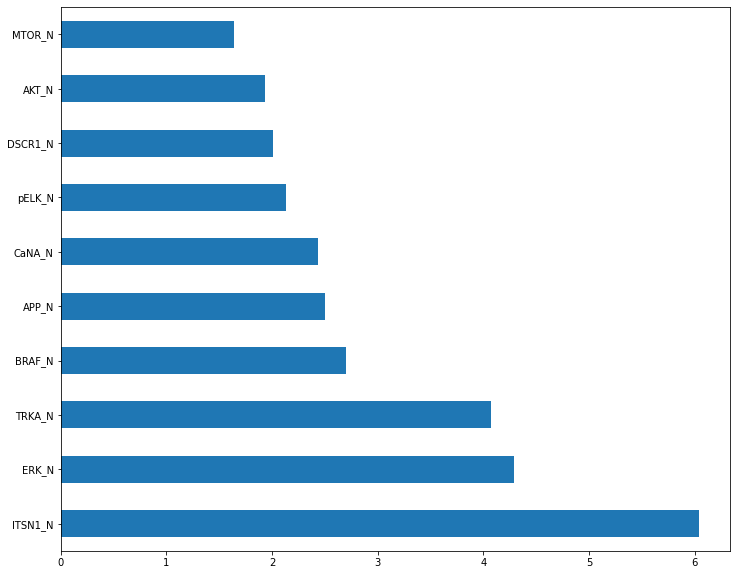

In [ ]:
#Initialization of the models 
model = RandomForestClassifier(max_depth = 10, max_features = 35, random_state=0)
selector = RFECV(svm, verbose = 1, scoring = 'accuracy', n_jobs = -1, cv =5)
selector.fit(df_imputed, df_target['Genotype'])
selected_featuresRFG = df_imputed.columns[selector.support_]

# Scaling for these specific features 
scalerRFG = StandardScaler()
scalerRFG.fit(df_imputed.loc[:, selected_featuresRFG])
dftrain_RFG = pd.DataFrame(scalerRFG.transform(df_imputed.loc[:, selected_featuresRFG]))

print("Selected features:", selected_featuresRFG)

#Plotting the best features in a simple Random Forest fit
svm.fit(df_imputed, df_target['Genotype'])
plt.figure(figsize = (12, 10))
pd.Series(abs(svm.coef_[0]), index=df_imputed.columns).nlargest(10).plot(kind='barh')

#### Treatment Behavior

Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 fe

<AxesSubplot:>

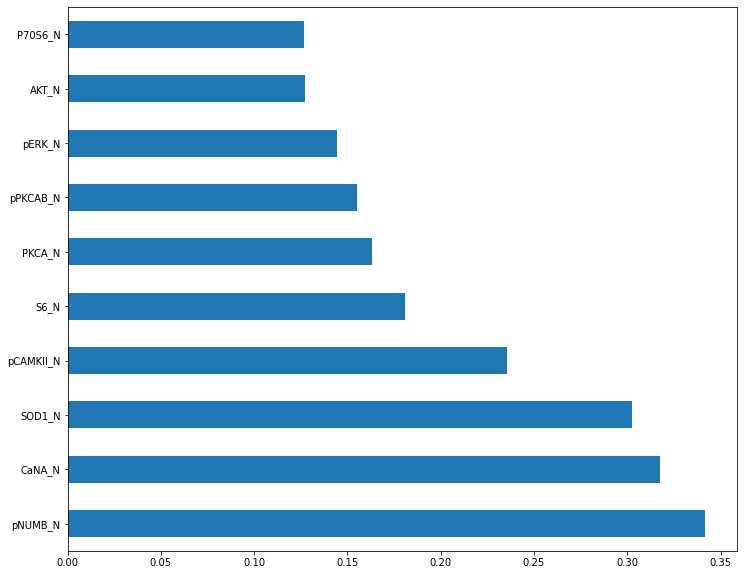

In [ ]:
#Initialization of the models 
model = RandomForestClassifier(max_depth = 10, max_features = 35, random_state=0)
selector = RFECV(svm, verbose = 1, scoring = 'accuracy', n_jobs = -1, cv =5)
selector.fit(df_imputed, df_target['Treatment_Behavior'])
selected_featuresRF = df_imputed.columns[selector.support_]

# Scaling for these specific features 
scalerRF = StandardScaler()
scalerRF.fit(df_imputed.loc[:, selected_featuresRF])
dftrain_RF = pd.DataFrame(scalerRF.transform(df_imputed.loc[:, selected_featuresRF]))

print("Selected features:", selected_featuresRF)

#Plotting the best features in a simple Random Forest fit
svm.fit(df_imputed, df_target['Treatment_Behavior'])
plt.figure(figsize = (12, 10))
pd.Series(abs(svm.coef_[0]), index=df_imputed.columns).nlargest(10).plot(kind='barh')

Features with maximum weight that is maximum importance are somewhat similar in both the cases.

As we can see that we end up with 44 features by using RBECV function as mentioned in the assignment.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

## Reading Test Data

In [ ]:
## Reading the test data
url = "https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv"
dfTest = pd.read_csv(url)
dfTest

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,Control,Memantine_C/S
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,NaN,1.638988,Control,Memantine_C/S
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,NaN,1.564925,Control,Memantine_C/S
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,NaN,1.682222,Control,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740,Ts65Dn,Saline_S/C
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347,Ts65Dn,Saline_S/C
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205,Ts65Dn,Saline_S/C
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718,Ts65Dn,Saline_S/C


In [ ]:
nan_count = df.isna().sum().sort_values() # Calculating all the NaN values that are there in each column
plt.figure(figsize = (12, 10))
# nan_count.plot(kind = "bar") # plotting the NaN values in ascending order
print(nan_count[-10:]) # Printing the last 10 variables with maximum NaN values

## Saving the dataframe with usable variables in a different variable
dftest_new = dfTest.drop(['Treatment_Behavior', 'Genotype'], axis = 1) # Removing the target columns for now
dftest_usable = dftest_new.loc[:, proteins]

#Scaling test data
dftest_scale = scaler.transform(dftest_usable)
dftest_scale = pd.DataFrame(dftest_scale)

##For the target values
dftest_target = dfTest[["Genotype", "Treatment_Behavior"]]
dftest_target['Treatment_Behavior'] = dftest_target['Treatment_Behavior'].map({"Memantine_C/S": 0, "Memantine_S/C": 1, "Saline_C/S": 2, "Saline_S/C": 3})
dftest_target['Genotype'] = dftest_target['Genotype'].map({'Control': 0, 'Ts65Dn': 1})


Treatment_Behavior      0
MEK_N                   4
ELK_N                  15
Bcatenin_N             15
pCFOS_N                60
H3AcK18_N             150
BAD_N                 180
EGR1_N                180
H3MeK4_N              180
BCL2_N                195
dtype: int64


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
<ipython-input-36-d7319af521f0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest_target['Treatment_Behavior'] = dftest_target['Treatment_Behavior'].map({"Memantine_C/S": 0, "Memantine_S/C": 1, "Saline_C/S": 2, "Saline_S/C": 3})
<ipython-input-36-d7319af521f0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest_target['Genotype'] = dft

<Figure size 864x720 with 0 Axes>

## Prediction and Accuracy Score

#### Genotype

In [ ]:
# Imports
from sklearn.metrics import accuracy_score
# Initialization of models
modelLin = LinearSVC(max_iter = 30000, C = 1)
svmRBF = SVC(kernel = 'rbf', C = 464.1588833612782, gamma = 0.003162277660168379)
model = MLPClassifier(hidden_layer_sizes=(15,), activation='relu', solver='adam', random_state=42, alpha=1.4677992676220675)
modelRF = RandomForestClassifier(random_state=0, max_depth = 10, max_features = 35)
# training models
modelLin.fit(df_imputed, df_target['Genotype'])
svmRBF.fit(df_imputed, df_target['Genotype'])
model.fit(df_imputed, df_target['Genotype'])
modelRF.fit(df_imputed, df_target['Genotype'])
# Making predictions and getting the score
predictionsL = modelLin.predict(dftest_scale)
predictionsRBF = svmRBF.predict(dftest_scale)
predictions = model.predict(dftest_scale)
predictionsRF = modelRF.predict(dftest_scale)
print("Score for Linear SVM is ", accuracy_score(predictionsL, dftest_target['Genotype']))
print("Score for RBF SVM is ", accuracy_score(predictionsRBF, dftest_target['Genotype']))
print( "Score for Neural Network is ", accuracy_score(predictions, dftest_target['Genotype']))
print( "Score for and Random Forest is ", accuracy_score(predictionsRF, dftest_target['Genotype']))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score for Linear SVM is  0.8
Score for RBF SVM is  0.8577777777777778
Score for Neural Network is  0.8577777777777778
Score for and Random Forest is  0.88


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Here we observe that all the Models provide score above 80 %. It can be observed that we find maximum accuracy for Random Forest.

#### Treatment Behavior

In [ ]:
# Initialization of models
modelLin = LinearSVC(max_iter = 30000, C = 10)
svmRBF = SVC(kernel = 'rbf', C = 26101.572156825387, gamma = 0.00017782794100389227)
model = MLPClassifier(hidden_layer_sizes=(18, 4), activation='relu', solver='adam', random_state=42, alpha=1.4677992676220675)
modelRF = RandomForestClassifier(random_state=0, max_depth = 10, max_features = 35)
# training models
modelLin.fit(df_imputed, df_target['Treatment_Behavior'])
svmRBF.fit(df_imputed, df_target['Treatment_Behavior'])
model.fit(df_imputed, df_target['Treatment_Behavior'])
modelRF.fit(df_imputed, df_target['Treatment_Behavior'])
# Making predictions and getting the score
predictionsL = modelLin.predict(dftest_scale)
predictionsRBF = svmRBF.predict(dftest_scale)
predictions = model.predict(dftest_scale)
predictionsRF = modelRF.predict(dftest_scale)
print("Score for Linear SVM is ", accuracy_score(predictionsL, dftest_target['Treatment_Behavior']))
print("Score for RBF SVM is ", accuracy_score(predictionsRBF, dftest_target['Treatment_Behavior']))
print( "Score for Neural Network is ", accuracy_score(predictions, dftest_target['Treatment_Behavior']))
print( "Score for and Random Forest is ", accuracy_score(predictionsRF, dftest_target['Treatment_Behavior']))


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score for Linear SVM is  0.8133333333333334
Score for RBF SVM is  0.8177777777777778
Score for Neural Network is  0.76
Score for and Random Forest is  0.6044444444444445


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


But for Multilabel classification Linear SVM and RBF SVM are the better models as their score is higher than the others

Reference:
https://stackoverflow.com/questions/42471082/how-to-find-out-the-accuracy#:~:text=You%20can%20always%20use%20sklearn%27s%20metrics%20to%20get,metrics.mean_squared_error%20%28y_test%2C%20predictions%29%20for%20mean%20squared%20errors.%20etc
For accuracy score

## Accuracy Score With Specific Features

#### Genotype

In [ ]:
#Now with selected features
modelLinG = LinearSVC(max_iter = 30000, C = 1)
modelRFG = RandomForestClassifier(random_state=0, max_depth = 10, max_features = 6)
## Training the model
modelLinG.fit(df_imputed.loc[:, selected_featuresG], df_target['Genotype'])
modelRFG.fit(df_imputed.loc[:, selected_featuresRFG], df_target['Genotype'])
# Finding their scores
dftestL_scale = pd.DataFrame(scalerLG.transform(dftest_usable.loc[:, selected_featuresG]))
dftestRF_scale = pd.DataFrame(scalerRFG.transform(dftest_usable.loc[:, selected_featuresRFG]))

predictionsLG = modelLinG.predict(dftestL_scale)
predictionsRFG = modelRFG.predict(dftestRF_scale)

print("Score for Linear SVM is ", accuracy_score(predictionsLG, dftest_target['Genotype']))
print( "Score for and Random Forest is ", accuracy_score(predictionsRFG, dftest_target['Genotype']))

Score for Linear SVM is  0.6
Score for and Random Forest is  0.6088888888888889


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### Treatment behavior

In [ ]:
#Now with selected features
modelLin = LinearSVC(max_iter = 30000, C = 10)
modelRF = RandomForestClassifier(random_state=0, max_depth = 10, max_features = 10)
## Training the model
modelLin.fit(df_imputed.loc[:, selected_features], df_target['Treatment_Behavior'])
modelRF.fit(df_imputed.loc[:, selected_featuresRF], df_target['Treatment_Behavior'])
# Finding their scores
dftestL_scale = pd.DataFrame(scalerL.transform(dftest_usable.loc[:, selected_features]))
dftestRF_scale = pd.DataFrame(scalerRF.transform(dftest_usable.loc[:, selected_featuresRF]))

predictionsL = modelLin.predict(dftestL_scale)
predictionsRF = modelRF.predict(dftestRF_scale)

print("Score for Linear SVM is ", accuracy_score(predictionsL, dftest_target['Treatment_Behavior']))
print( "Score for and Random Forest is ", accuracy_score(predictionsRF, dftest_target['Treatment_Behavior']))

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Score for Linear SVM is  0.5333333333333333
Score for and Random Forest is  0.26666666666666666


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


We observe that using the features which work nicely for the training set can cause overfitting hence causing the accuracy for test cases to drop

# Objective 2

##Imports

In [ ]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

##Loading Data

In [ ]:
#Imports 
import urllib.request
from shutil import unpack_archive
# Getting the zip file 
url = 'https://download.pytorch.org/tutorial/hymenoptera_data.zip'
filename = 'hypmenoptera_data.zip'
# Extracting the zip file
urllib.request.urlretrieve(url, filename)

unpack_archive("hypmenoptera_data.zip")

Credits : Shashank Balaji 200070043

In [ ]:
from torchvision import datasets, models, transforms
import os


# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


We can download the image data set from here -> https://download.pytorch.org/tutorial/hymenoptera_data.zip

## Visualize A few Images

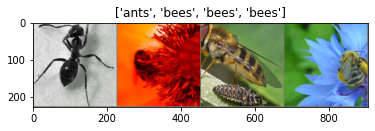

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

## Defining Model Params

In [ ]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

## Training Model

In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6185 Acc: 0.6721
val Loss: 0.2103 Acc: 0.9281

Epoch 1/24
----------
train Loss: 0.5588 Acc: 0.7705
val Loss: 0.1964 Acc: 0.9216

Epoch 2/24
----------
train Loss: 0.6047 Acc: 0.7705
val Loss: 0.3302 Acc: 0.8889

Epoch 3/24
----------
train Loss: 0.6007 Acc: 0.7664
val Loss: 0.2231 Acc: 0.9281

Epoch 4/24
----------
train Loss: 0.4759 Acc: 0.7992
val Loss: 0.2596 Acc: 0.9150

Epoch 5/24
----------
train Loss: 0.4456 Acc: 0.8115
val Loss: 0.1924 Acc: 0.9477

Epoch 6/24
----------
train Loss: 0.3886 Acc: 0.8197
val Loss: 0.1928 Acc: 0.9477

Epoch 7/24
----------
train Loss: 0.3876 Acc: 0.8361
val Loss: 0.1797 Acc: 0.9477

Epoch 8/24
----------
train Loss: 0.3093 Acc: 0.8607
val Loss: 0.2247 Acc: 0.9150

Epoch 9/24
----------
train Loss: 0.2976 Acc: 0.8607
val Loss: 0.1912 Acc: 0.9477

Epoch 10/24
----------
train Loss: 0.4195 Acc: 0.8074
val Loss: 0.2144 Acc: 0.9216

Epoch 11/24
----------
train Loss: 0.3246 Acc: 0.8730
val Loss: 0.1834 Acc: 0.9346

Ep

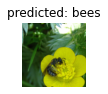

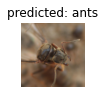

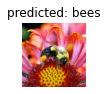

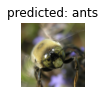

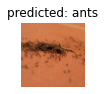

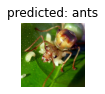

In [ ]:
visualize_model(model_conv)

plt.ioff()
plt.show()

## Extracting Features from Image

In [ ]:
model_conv.fc = nn.Identity() # Set the final layer of the ResNet to identity so that input 512 features are output
model_conv = model_conv.to(device)

def extract_features(image):
    return model_conv(image)

Credit: Shashank Balaji 200070043

In [ ]:
trainIMG, trainOutIMG = zip(*image_datasets["train"])
testIMG, testOutIMG = zip(*image_datasets["val"])

trainIMG = torch.stack(trainIMG)
testIMG = torch.stack(testIMG)

trainFeatures = extract_features(trainIMG.to(device))
testFeatures = extract_features(testIMG.to(device))
print("Shape of training featres is ", trainFeatures.shape, "While the shape of test features is ", testFeatures.shape)

Shape of training featres is  torch.Size([244, 512]) While the shape of test features is  torch.Size([153, 512])


## Testing these features for different Models

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


C = np.logspace(-2, 5, 13)
params = dict(C = C)
l = LogisticRegression(penalty='l2')
grid_log = GridSearchCV(l, params, verbose = 1, n_jobs = -1, cv = 5, scoring = "accuracy")

grid_log.fit(trainFeatures, trainOutIMG)
# Print the best score and parameters
print(grid_log.best_score_)
print(grid_log.best_params_)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
0.8687925170068027
{'C': 0.01}


In [ ]:
log = LogisticRegression(penalty='l2', C=0.01)

# Fit the model to the training data
log.fit(trainFeatures, trainOutIMG)

# Predict the class labels for the test data
y_pred = log.predict(testFeatures)
score = accuracy_score(testOutIMG, y_pred)
score_f1 = f1_score(testOutIMG, y_pred)
print("Scores for logisitic regression are: accuracy = ", score, ", f1 score = ", score_f1)

Scores for logisitic regression are: accuracy =  0.9411764705882353 , f1 score =  0.9454545454545454


We can see that using features from a convolutional neural network can highly increase accuracy of the model.

Reference: 

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html


### RBF Kernel SVM

In [ ]:
## For RBF SVM

C = np.logspace(-2, 5, 13)
gamma = np.logspace(-5, 10, 13)
param = dict(C = C, gamma = gamma)
grid_RBF = GridSearchCV(SVC(), param, verbose = 3, n_jobs = -1, cv=5, scoring = 'accuracy')

# Fit the grid search on the data
grid_RBF.fit(trainFeatures, trainOutIMG) 
# Print the best score and parameters
print(grid_RBF.best_score_)
print(grid_RBF.best_params_)

Fitting 5 folds for each of 169 candidates, totalling 845 fits
0.8893707482993196
{'C': 0.5623413251903491, 'gamma': 0.0031622776601683794}


In [ ]:
# Training
rbfModel = SVC(kernel = "rbf", C = 2.15443469003188, gamma = 0.003162277660168379)
rbfModel.fit(trainFeatures, trainOutIMG)
# Making predictions
rbf_pred = rbfModel.predict(testFeatures)
score = accuracy_score(testOutIMG, rbf_pred)
score_f1 = f1_score(testOutIMG, y_pred)
print("Scores for RBF Kernel SVM are: accuracy = ", score, ", f1 score = ", score_f1)

Scores for RBF Kernel SVM are: accuracy =  0.9411764705882353 , f1 score =  0.9454545454545454


We can see that both logistic regression and RBF kernel are good models for the given data

### Random Forest

In [ ]:
## Now for random forest

max_features = [35, 45, 55, 65, 75]
max_depth = [8, 10, 12, 15, 25]
params = dict(max_features = max_features, max_depth = max_depth)
model = RandomForestClassifier()
grid_RF = GridSearchCV(model, params, verbose = 1, n_jobs = -1, cv = 5, scoring = 'accuracy')

grid_RF.fit(trainFeatures, trainOutIMG)

print(grid_RF.best_score_)
print(grid_RF.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
0.9057823129251702
{'max_depth': 8, 'max_features': 65}


In [ ]:
RFmodel = RandomForestClassifier(max_depth = 8, max_features = 65)

RFmodel.fit(trainFeatures, trainOutIMG)

rf_pred = RFmodel.predict(testFeatures)
score = accuracy_score(testOutIMG, rf_pred)
score_f1 = f1_score(testOutIMG, y_pred)
print("Scores for Random Forest are: accuracy = ", score, ", f1 score = ", score_f1)

Scores for Random Forest are: accuracy =  0.9281045751633987 , f1 score =  0.9454545454545454


It turns out that random forest is not that good model when compared to the previous models.

## Findings and References

### Aim

The Aim for this assignment was to understand many different models and their working.

We started with finding the usable features and then we did some feature engineering which consisted of finding feauteres with very low variances as they won't effect the output that much. 

Then I scaled the data so that each feature can be used productively and computational time will decrease as well. This was a problem I faced in LinearSVM when I was using unscaled data. 

### Objective 1
In Objective 1, I got the usable features. Then found the hyperparameters which yields the best score. Then afterwards I calculated each features' importances and then imputed and used more important features for test data seperately afterwards. 

Afterwards I trained the models for the hyperparameters we got earlier and calculated their accuracy. For Binary classification all the models performed nicely but for multilabel classification Linear and RBF SVM were a better choice.

Overall the first part of this assignment helped me understand what is the usual go to algorithmic way of preparing data for model and how to use this data to find hyperparameters and then deploying the models for both binary and multilabel classification. 

### Objective 2
In Objective 2, We used a convolutional neural network to get the features instead of manually selecting them like we did in Objective 1. and then used these features for classification while deploying different models. 

It was obvious that pretrained CNN being used for features and then predicting using these features yields a higher accuracy and F1 score. Which was another observation noted when I ran Logisitic Regression, RBF kernel SVM, and Random Forests. 

### People from whom I took help

#### Shashank Balaji 200070043

Took help from him in Objective 2 about how to unpack a zip file. And the idea of changing the last layer of the model to identity to get a feature extractor

#### Hemant Hajare 20D070037

Took help in how to use GirdSearchCV and what parameters are to be used for better performance.

####Bhavya Kohli 20D070021

Explained how 1 hot matrix works and how it is used in softmax approximation


### Reference:

I've tried to add references after every block whenever I used something new or something that I didn't knew before but I'll add all of them once more.

https://www.scaler.com/topics/pandas/read-csv-file-in-python-pandas/

https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url

https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://stackoverflow.com/questions/27787930/how-to-get-number-of-groups-in-a-groupby-object-in-pandas

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/modules/impute.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#examples-using-sklearn-model-selection-gridsearchcv

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html

https://stackoverflow.com/questions/41628264/how-to-determine-feature-importance-of-non-linear-kernals-in-svm

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

https://machinelearningmastery.com/multi-label-classification-with-deep-learning/

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

https://stackoverflow.com/questions/42471082/how-to-find-out-the-accuracy#:~:text=You%20can%20always%20use%20sklearn%27s%20metrics%20to%20get,metrics.mean_squared_error%20%28y_test%2C%20predictions%29%20for%20mean%20squared%20errors.%20etc

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html